In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Load the data
df= pd.read_csv(r"C:/DataScience/Project/Machine Downtime.csv")

# View the load data
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


CLEANING DATA

In [4]:
# Basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [5]:
# Check for null values
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [6]:
# Dropping null values
df1=df.dropna()
df1.isnull().sum().sum()

np.int64(0)

In [7]:
# Renaming few columns
for i in df:
    j=i.replace("(bar)","")
    j=j.replace("(?C)","")
    j=j.replace("(?m)","")
    j=j.replace("(RPM)","")
    j=j.replace("(volts)","")
    j=j.replace("(Nm)","")
    j=j.replace("(kN)","")
    df1=df1.rename(columns={i:j})

In [8]:
df1.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure',
       'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
       'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed', 'Voltage',
       'Torque', 'Cutting', 'Downtime'],
      dtype='object')

In [10]:
df1.shape

(2381, 16)

In [11]:
# Statistical view of the data
df1.describe()

,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,101.184167,4.955532,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,2.785586
std,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.615749
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,1.800000
25%,76.220000,4.470511,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,96.165147,4.940503,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,126.302016,5.526438,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,36.500000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [12]:
# Check for duplicate values
df1.duplicated().sum()

np.int64(0)

<!-- Replacing the Downtime column values as:
> Machine_Failure = 1
> No_Machine_Failure = 0 -->

In [13]:
# Replacing values in "Downtime" column
dict_to_replace={"Machine_Failure":1,"No_Machine_Failure":0}
for k,v in dict_to_replace.items():
    df1["Downtime"]=df1["Downtime"].replace(k,v)

df1["Downtime"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7812\2034299773.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Downtime"]=df1["Downtime"].replace(k,v)


0       1
1       1
2       1
3       1
4       1
       ..
2494    0
2495    0
2496    0
2498    0
2499    1
Name: Downtime, Length: 2381, dtype: int64

In [14]:
# Analyse datatypes of each column
df1.dtypes

Date                            object
Machine_ID                      object
Assembly_Line_No                object
Hydraulic_Pressure             float64
Coolant_Pressure               float64
Air_System_Pressure            float64
Coolant_Temperature            float64
Hydraulic_Oil_Temperature      float64
Spindle_Bearing_Temperature    float64
Spindle_Vibration              float64
Tool_Vibration                 float64
Spindle_Speed                  float64
Voltage                        float64
Torque                         float64
Cutting                        float64
Downtime                         int64
dtype: object

In [15]:
#  Standardizing the Date column to YYYY-MM-DD format
df1['Date']=pd.to_datetime(df1["Date"], errors='coerce').dt.strftime("%Y-%m-%d")
df1["Date"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7812\1807859393.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date']=pd.to_datetime(df1["Date"], errors='coerce').dt.strftime("%Y-%m-%d")


0       2021-12-31
1       2021-12-31
2       2021-12-31
3       2022-05-31
4       2022-03-31
           ...    
2494    2022-02-01
2495    2022-02-01
2496    2022-02-01
2498    2022-02-01
2499    2022-02-01
Name: Date, Length: 2381, dtype: object

# EDA ON MACHINE DOWNTIME

1. Finding the unique number of machines tested?

In [16]:
# Find the unique model of machines in "Machine_ID" and "Assembly_Line_No" column
machines = df1['Machine_ID'].unique()
assmebly = df1["Assembly_Line_No"].unique()
print(machines)
print(assmebly)

['Makino-L1-Unit1-2013' 'Makino-L3-Unit1-2015' 'Makino-L2-Unit1-2015']
['Shopfloor-L1' 'Shopfloor-L3' 'Shopfloor-L2']


CONCLUSION : Three types of Machine models and assembly lines are present in the data.

2. What are the numbers of occurrences of failure and no failure?

Machine failure: 1 
No Machine failure: 0
Downtime
1    1231
0    1150
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7812\2405078180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=downtime_counts.index, y=downtime_counts.values, palette="Set2")


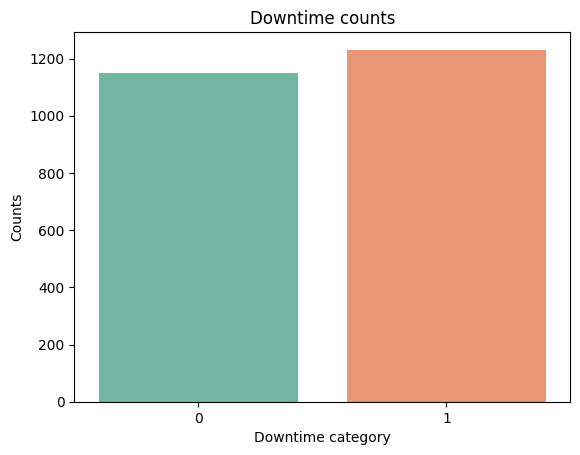

In [17]:
# Analyze the unique values and their counts in the 'Downtime' column
downtime_counts = df1['Downtime'].value_counts()

# Display the number of occurrences of machine downtime
print("Machine failure: 1 \nNo Machine failure: 0")
print(downtime_counts)

# Plotting the downtime counts
sns.barplot(x=downtime_counts.index, y=downtime_counts.values, palette="Set2")

plt.title("Downtime counts")
plt.xlabel("Downtime category")
plt.ylabel("Counts")
plt.show()


CONCLUSION: The Downtime column shows whether a failure occurred or not. 
The total failures occurred is calculated to be 1231.

2. Find downtime over time?

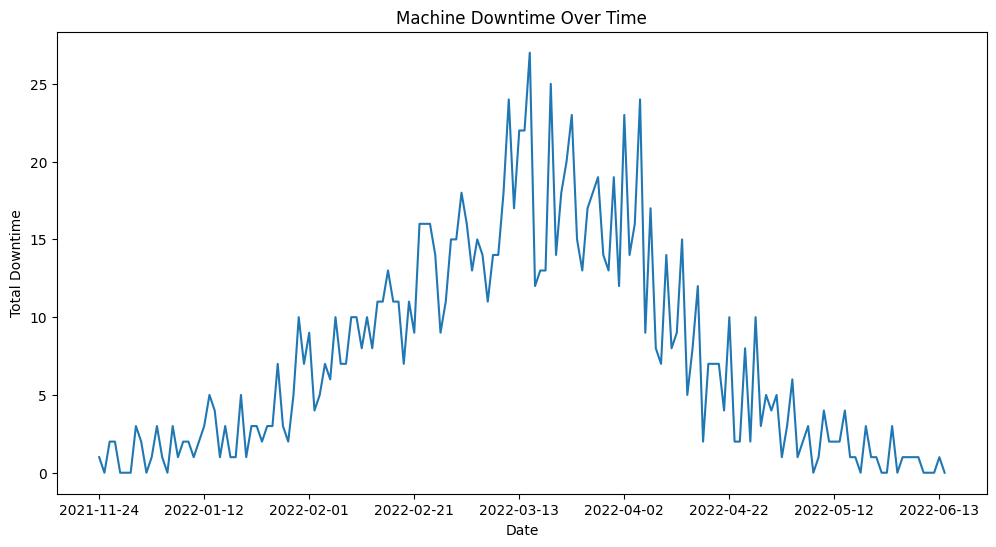

In [18]:
plt.figure(figsize=(12, 6))
df1.groupby('Date')['Downtime'].sum().plot()
plt.title('Machine Downtime Over Time')
plt.xlabel('Date')
plt.ylabel('Total Downtime')
plt.show()

CONCLUSION : From the plot it is clear that the maximum downtime occurs on 2022-03-13 or during the month of March,2022. 

3. The occurrence of downtime on monthly, weekly and daily basis?

In [19]:
# Extracting year, month and day
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day_of_Week'] = df1['Date'].dt.dayofweek

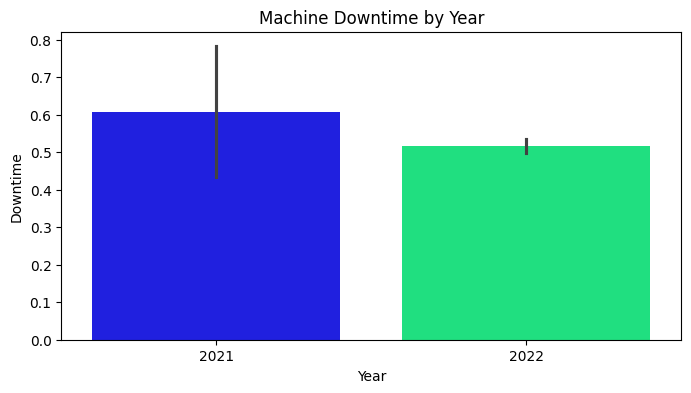

In [27]:
# Plot yearly downtime occurrence
plt.figure(figsize=(8, 4))
sns.barplot(x='Year', y='Downtime', data=df1, hue="Year", legend=False, palette='winter')
plt.title('Machine Downtime by Year')
plt.show()

CONCLUSION : Frequent downtime occurred during the year 2021.

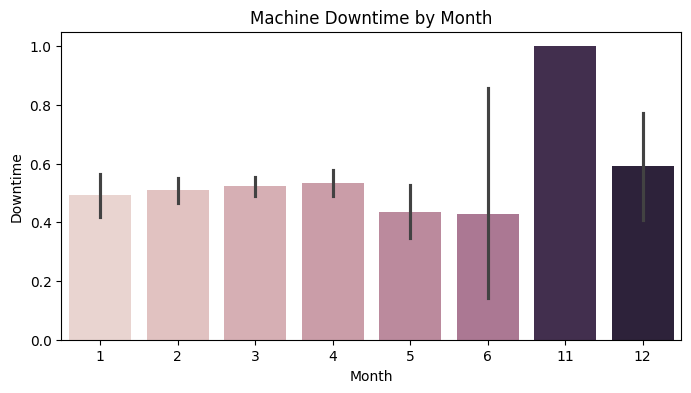

In [53]:
# Plot monthly downtime occurrence
plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='Downtime', data=df1, hue="Month", legend=False)
plt.title('Machine Downtime by Month')
plt.show()

CONCLUSION : On monthly basis it is seen that downtime occurs more during the month of November.

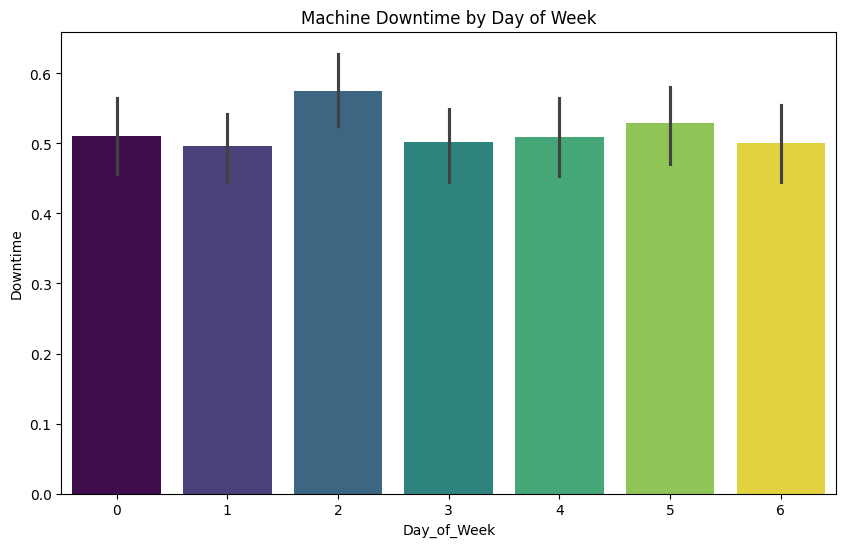

In [55]:
# Plot downtime occurrence by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Downtime', data=df1, hue="Day_of_Week", legend=False, palette="viridis")
plt.title('Machine Downtime by Day of Week')
plt.show()

CONCLUSION : Second day of the week is marked to have more downtime occurrence.

4. Which Machine is more prone to Downtime?

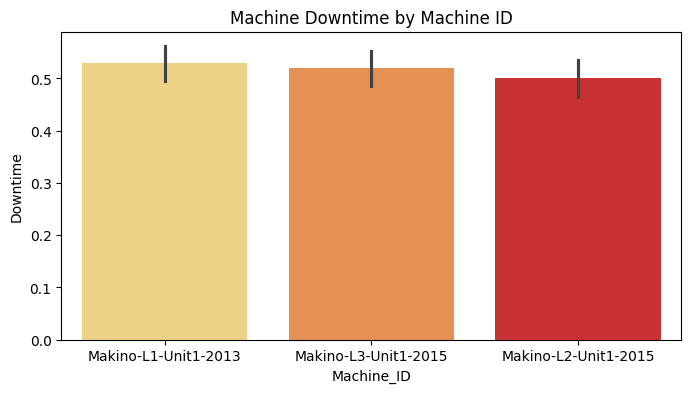

In [58]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Machine_ID', y='Downtime', data=df1, hue="Machine_ID", legend=False, palette='YlOrRd')
plt.title('Machine Downtime by Machine ID')
plt.xticks(rotation=0)
plt.show()

CONCLUSION : The machine with Machine_ID "Makino-L1-Unit1-2013 is more prone to failure when compared with the other two models. 

5. Downtime by Assembly line?

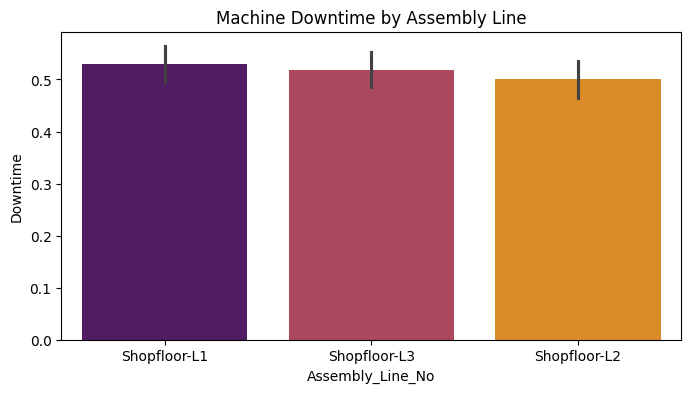

In [60]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Assembly_Line_No', y='Downtime', data=df1, hue="Assembly_Line_No", legend=False, palette='inferno')
plt.title('Machine Downtime by Assembly Line')
plt.show()

CONCLUSION : Assembly line "Shopfloor-L1" is visualized to show slightly greater downtime occurrence than the other two.

## MACHINE LEARNING

ALGORITHMS : 1. Logistic Regression, 2. KNN, 3. SVM, 4. Decision Tree, 5. Random Forest

In [16]:
#  Import librabries for Machine learning
from sklearn import metrics

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          2381 non-null   object 
 1   Machine_ID                    2381 non-null   object 
 2   Assembly_Line_No              2381 non-null   object 
 3   Hydraulic_Pressure            2381 non-null   float64
 4   Coolant_Pressure              2381 non-null   float64
 5   Air_System_Pressure           2381 non-null   float64
 6   Coolant_Temperature           2381 non-null   float64
 7   Hydraulic_Oil_Temperature     2381 non-null   float64
 8   Spindle_Bearing_Temperature   2381 non-null   float64
 9   Spindle_Vibration             2381 non-null   float64
 10  Tool_Vibration                2381 non-null   float64
 11  Spindle_Speed                 2381 non-null   float64
 12  Voltage                       2381 non-null   float64
 13  Torque  

In [18]:
# Selecting Features
# Splitting the dataset into features and traget variables

x = df1.iloc[:,:14].values  # Features
y = df1["Downtime"].values   # Target variable

In [19]:
#  Categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()

In [20]:
ct = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(drop="first"),[df.columns.get_loc(col) for col in df.columns[:14] if df[col].dtype == "object"])
    ],
    remainder="passthrough"
)

x_transformed = ct.fit_transform(x)   # To convert columns containing strings to numeric using OneHotEncoder

In [21]:
df_transformed = pd.DataFrame(x_transformed)

In [22]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.25,random_state=0)

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler(with_mean=False)
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [24]:
# Set the datatype of training target variable to int
y_train - y_train.astype('int') 

array([0, 0, 0, ..., 0, 0, 0])

1. LOGISTIC REGRESSION

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(solver="lbfgs",max_iter=1000)

# Fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:
#  Prediction
y_pred = logreg.predict(x_test)
y_pred = y_pred.astype("int")

In [27]:
# Evaluating the Algorithm
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy :  81.04026845637584 %


In [28]:
# Hypertuning of parameters for the best fit model
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [300, 500, 1000]
}

# Best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)
print("Best parameteres : ", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_
# Predictions
y_grid_pred = best_model.predict(x_test)

# Accuracy
print("Accuracy : ", metrics.accuracy_score(y_test,y_grid_pred)*100, "%")

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameteres :  {'C': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy :  80.53691275167785 %


2. KNN 

In [29]:
# Fit K-NN classifier to the training data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric="minkowski", p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
# Predictions
y_pred = classifier.predict(x_test)
y_pred = y_pred.astype("int")

In [31]:
# Check accuracy of the prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acccuracy : %.4f" % (accuracy*100), "%")

Acccuracy : 70.3020 %


In [32]:
# Find the best parameters and best model using hypertuning of parameters
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'brute']
}

# Best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameteres : ", grid_search.best_params_)


# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy of the prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}", "%")


Best parameteres :  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 77.1812 %


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


3. SVM

In [33]:
# Fit SVC classifier to the training data
from sklearn.svm import SVC
classifier = SVC(kernel= "linear", random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [34]:
# Prediction
y_pred = classifier.predict(x_test)
y_pred = y_pred.astype("int")

In [35]:
# Acccuarcy
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy : {accuracy: .4f}", "%")

Accuracy :  79.5302 %


In [37]:
# Find the best parameters and best model using hypertuning of parameters 
model = SVC()
param_grid = {
   'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma': ['scale', 'auto']
}

# Best parameter 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5) 
grid_search.fit(x_train, y_train)
print("Best parameter : ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.4f}","%")

Best parameter :  {'C': 0.1, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 80.3691 %


4. Decision Tree

In [39]:
# Fitting Decision Tree to the training data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
# Prediction
y_pred = classifier.predict(x_test)
y_pred = y_pred.astype("int")

# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy : {accuracy:.4f}", "%")

Accuracy : 98.8255 %


In [41]:
# Find best fit using hypertuning of parameters
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 7],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

# Best parameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best parameter : ", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy : {accuracy:.4f}","%")

Best parameter :  {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy : 97.4832 %


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


5. RANDOM FOREST

In [42]:
# Fitting RandomForest to the training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10,criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
# Prediction
y_pred = classifier.predict(x_test)
y_pred = y_pred.astype("int")

# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy : {accuracy:.4f}","%")

Accuracy : 95.9732 %


In [45]:
# Finding best fit using hypertuning of parameters
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10]
}

# Best parameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best parameter : ", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.4f}","%")

Best parameter :  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 94.9664 %


CONCLUSION : From ML Models created Decision Tree gives the maximum accuracy score of 98.8255 % with parameter(criterion='entropy').

## FINAL CONCLUSION
After evaluating several machine learning models, including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Logistic Regression, Random Forest, and Decision Tree, the Decision Tree model outperformed the others, achieving an impressive accuracy of <b>98.82%</b>. This indicates that the Decision Tree model effectively captured the complex relationships between the features and the target variable, 'Downtime'.